# Matplotlib Overview

[Section worksheet on Colab](https://colab.research.google.com/github/tychen742/dsm/blob/main/chapters/06-visualization/0603-vis-mpl-intro-worksheet-with-output.ipynb)  
[Section exercise - Questions](https://colab.research.google.com/github/tychen742/dsm/blob/main/chapters/06-visualization/0604-vis-mpl-exercises-questions.ipynb)

## Introduction

Matplotlib is the foundational plotting library in the Python ecosystem, originally developed by John D. Hunter to provide MATLAB-like plotting capabilities in Python. It offers a rich, programmatic interface for producing quality 2D graphics. For a history and introduction of Matplotlib, see matplotlib.org's [History](https://matplotlib.org/stable/project/history.html) section.

For data scientists, Matplotlib is valuable both as a plotting tool and as a powerful engine for fine-grained customization when presentation quality and plot element customization are required. 

Matplotlib sits at a low level in the Python visualization stack: 

1. Many higher-level libraries (for example, Pandas’ plotting methods and Seaborn) build on top of it.
2. It interoperates smoothly with NumPy arrays, and therefore the scientific Python toolchain.
3. Matplotlib can be used either via two interfaces:
   1. The MATLAB-style stateful pyplot API (the `plot()` function) creates both the `figure` and `axes` automatically for quick interactive work.
   2. The object-oriented API uses functions such as `plt.subplots()` or `plt.figure()` to create and returns a new figure object for more control in complex figures.

Matplotlib has great documentation and tutorials with  practical examples available at https://matplotlib.org/ (see the [Tutorials](https://matplotlib.org/stable/tutorials/index.html]) and [Examples](https://matplotlib.org/stable/gallery/index.html)).

### Installation 

You'll need to install matplotlib first with either using `pip` in the terminal:

    pip install matplotlib     ### in terminal with .venv enabled
or using `%pip` in the notebook:

    %pip install matplotlib    ### in Jupyter Notebook

Import the `matplotlib.pyplot` module under the name `plt`:

In [1]:
import matplotlib.pyplot as plt

To render visualization outside of a Jupyter notebook (e.g., VS Code), you usually need to use the command `plt.show()`. Also, if you are using a Jupyter (IPython) version before version 7, you may need to add the `%matplotlib inline` line to render plots in the notebook cell. 

You can check out the version of IPython by:

In [2]:
### remember !pip vs %pip? what is the difference?

!jupyter --version

Selected Jupyter core packages...
IPython          : 9.6.0
ipykernel        : 6.30.1
ipywidgets       : 8.1.7
jupyter_client   : 8.6.3
jupyter_core     : 5.8.1
jupyter_server   : 2.17.0
jupyterlab       : 4.4.9
nbclient         : 0.10.2
nbconvert        : 7.16.6
nbformat         : 5.10.4
notebook         : 7.4.7
qtconsole        : not installed
traitlets        : 5.14.3


In [3]:
### as a bonus, to check if we need %matplotlib inline programmatically

j = !jupyter --version
print(type(j), j)

jv = int(j[1].split(':')[1].strip().split('.')[0])
if jv < 7:
    %matplotlib inline


<class 'IPython.utils.text.SList'> ['Selected Jupyter core packages...', 'IPython          : 9.6.0', 'ipykernel        : 6.30.1', 'ipywidgets       : 8.1.7', 'jupyter_client   : 8.6.3', 'jupyter_core     : 5.8.1', 'jupyter_server   : 2.17.0', 'jupyterlab       : 4.4.9', 'nbclient         : 0.10.2', 'nbconvert        : 7.16.6', 'nbformat         : 5.10.4', 'notebook         : 7.4.7', 'qtconsole        : not installed', 'traitlets        : 5.14.3']


That `%matplotlib inline` line is only for jupyter notebooks, if you are in other environments, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

## Plotting with plt.plot( )

The MATLAB-style pyplot API uses the `plt.plot()` function to create plots, then other plt functions (such as xlabel, ylabel, and title) to customize the plots.

### Basic Matplotlib Commands

Let us compare the basic commands used when using the `plt.plot()` function to create plots. The corresponding Pandas `df.plot`() methods are listed for comparison. 

| Task     | Matplotlib plt.plot()  | Pandas df.plot()                      | Notes                                                           |
|----------|------------------------|---------------------------------------|---------------------------------------------------------------|
| figsize  | `plt.figure(figsize)`  | `df.plot(figsize=(m, n))`             | Use `plt.figure()` to setup figure size before `plot.plt()`     |
| To plot  | `plt.plot(x, y)`       | `df.plot(x="x", y="y")` or `s.plot()` | Uses DataFrame/Series directly; x defaults to index if omitted. |
| X label  | `plt.xlabel("X")`      | `df.plot(xlabel=...)`                 | `df.plot(...)` returns an `Axes`; set labels on it.             |
| Y label  | `plt.ylabel("Y")`      | `df.plot(ylabel=...)`                 | Same pattern as label.                                          |
| Title    | `plt.title("My Plot")` | `df.plot(title="My Plot")`            | Pandas supports `title=` in `plot`                              |


Pandas .plot() is a convenience wrapper around plt.plot() for quick DataFrame visualization. Here we are using the plot function from Matplotlib. The differences between Pandas `.plot()` and Matplotlib `plt.plot()` can be summarized as:

| Feature | `plt.plot()` | Pandas `.plot()` |
|---------|--------------|-------------|
| Typical use | Fine-grained, figure-level control | Fast EDA from DataFrame/Series |
| Built on | Core matplotlib | Wrapper around matplotlib |
| Customization | Full control | Limited, but can access underlying axes |
| Data Input | Expects x/y arrays | Pandas columns/index |

Let’s walk through a simple example with two NumPy arrays. Lists work too, but you’ll usually pass NumPy arrays or Pandas columns, which behave like arrays. The data we want to plot:

In [11]:
import numpy as np

x = np.linspace(0, 5, 11)     ### 11 numbers from 0 to 5, inclusive
y = x ** 2

In [12]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [13]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

The following code produces a basic line plot. As you work, use `Shift+Tab` in Jupyter to view each function’s inline documentation (docstrings).

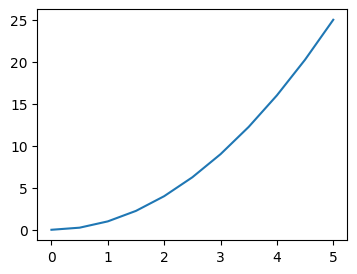

In [32]:
plt.figure(figsize=(4,3))          

plt.plot(x, y)               

To customize graph elements to the plot:

- color
- label (legend information)
- x-label, y-label
- title
- legend (information from label)

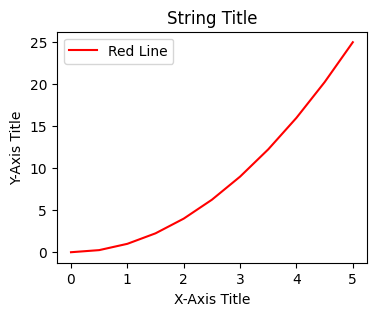

In [33]:
# plt.plot(x, y, 'r')           ### 'r' means color red
# plt.plot(x, y, c='r')         ### same as above, we saw this in Pandas plot

plt.figure(figsize=(4,3))
plt.plot(x, y, c='red', label='Red Line')         ### same as above, we saw this in Pandas plot
plt.xlabel('X-Axis Title')      ### in Pandas plot, this is automatic from column names
plt.ylabel('Y-Axis Title')      ### in Pandas plot, this is automatic from column names
plt.title('String Title')       ### in Pandas plot, this is missing and needs to be set manually
plt.legend()                    ### to show the label we set above

The same plot can be done in Pandas plot():

<Axes: title={'center': 'String Title'}, xlabel='X-Axis Title', ylabel='Y-Axis Title'>

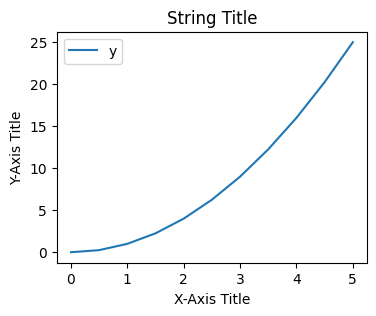

In [34]:
import pandas as pd
df = pd.DataFrame({'x': x, 'y': y}) ### DataFrame with two columns

# df.plot.line(x='x', y='y')          ### line plot is default in Pandas; axes is automatically created
# df.plot(x='x', y='y')               ### same as above

df.plot(x = 'x', y = 'y', xlabel='X-Axis Title', ylabel='Y-Axis Title', title='String Title', figsize=(4,3))       
### all labels and title can be set in df.plot() directly or from dataframe column names

### Multiple Plots with `subplot`

We use the `subplot()` (**NOT `subplots()`** later) function in pyplot to create multiple `axes` in one `figure`. The syntax is:

`plt.subplot(nrows, ncols, plot_number)`

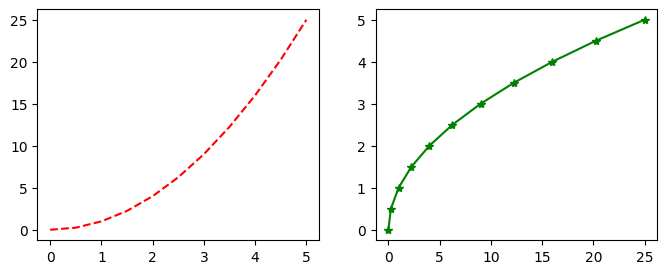

In [35]:
### plt.subplot(nrows, ncols, plot_number)   ### when you want multiple plots in one figure
### order is important, plot after subplot
plt.figure(figsize=(8,3))          ### create a figure first with specified size

plt.subplot(1, 2, 1)     ### subplot (axes) 1 of 1 row, 2 columns
plt.plot(x, y, 'r--')    ### 'r--' means red dashed line
plt.subplot(1, 2, 2)     ### subplot (axes) 2 of 1 row, 2 columns
plt.plot(y, x, 'g*-');   ### 'g*-' means green line with star markers

## Object-Oriented Matplotlib

Matplotlib’s object-oriented (OOP) API is a recommended approach for creating plots. The OOP approach creates **Figure** and **Axes** **objects** and control the plot by calling methods on those objects. This shines when you need multiple plots or precise layout on a single canvas.

### `plt.figure()` 

The process of plotting with the OOP approach: 
1. Create the **figure object** first, then 
2. Add **axes** to the **figure**
3. Use plot() to draw the plot

Also, there's a set of methods to customize the axes, such as:
- set_xlabel
- set_ylabel
- set_title

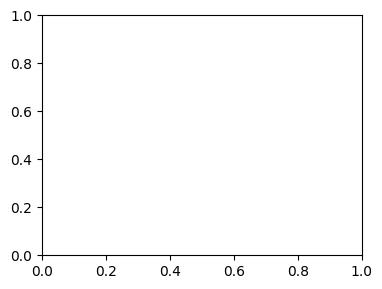

In [26]:
### just an explanation on figsize
### the default size of the figure is 640*480 pixels 
### (width * height 8 by 6 inches at 80 dpi)

fig = plt.figure(figsize=(4,3))            ### 1. create empty canvas on the figure (object)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  ### 2. axes and left, bottom, width, height (range 0 to 1)

### left = 0.1   => start 10% in from the figure’s left edge
### bottom = 0.1 => start 10% up from the bottom
### width = 0.8  => span  80% of the figure’s width
### height = 0.8 => span  80% of the figure’s height

While slightly more involved, the OOP approach gives us precise control over where the plot axes are placed and makes it straightforward to add multiple axes to a single figure. Here we are:
1. Creating one **Figure** object `fig`
2. Creating two **Axes** in one figure (and control the location and size of the axes)
3. Plotting the axes
4. Customizing the axes elements separately. 

Text(0.5, 1.0, 'Axes 2 Title')

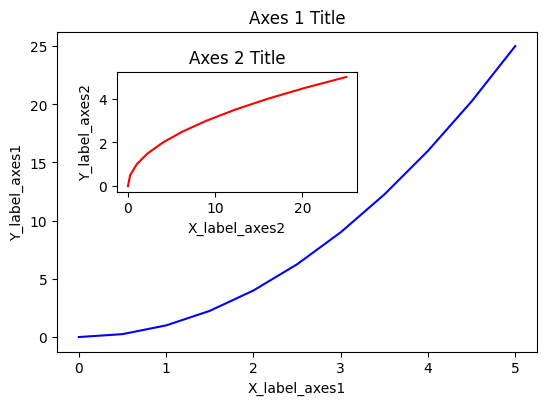

In [42]:
fig = plt.figure(figsize=(6,4))            ### create empty canvas on the figure (object)

### add two axes to the figure
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])     ### main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])     ### inset axes

### larger figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

### insert figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title')

### `plt.subplots( )`

With `plt.subplots()`, you create the **figure** objects and **axes** in one step, as in contrast with the two-step way of `plt.figure()` outlined above. `plt.subplot()` returns a tuple: (figure, axes). With **tuple unpacking**, you create the figure object and the axes object(s) in one step. The axes object is an array of axes if more than one subplot is created. The syntax is:

`fig, ax = plt.subplots()`

The code below creates one axes in one figure with x and y labels and title customized.

Text(0.5, 1.0, 'Title via Object-Oriented API')

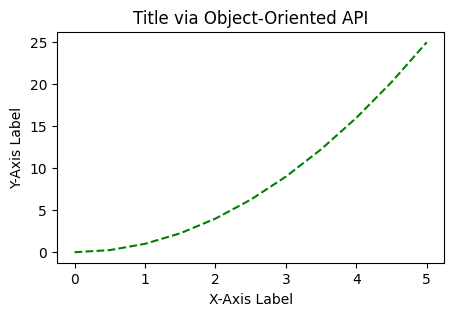

In [45]:
# print(type(plt.subplots()))   ### returns tuple of (figure, array of axes)
# plt.subplots()[0]             ### figure object
# plt.subplots()[1]             ### array of axes object
# plt.subplots()[1][0]          ### first axes object

fig, ax = plt.subplots(figsize=(5,3))       ### create figure (canvas) and axes object in one step
ax.plot(x, y, 'g--')                        ### plot on the axes    
ax.set_xlabel('X-Axis Label')
ax.set_ylabel('Y-Axis Label')
ax.set_title('Title via Object-Oriented API')

With `subplots()`, you can specify the number of rows and columns when creating the subplots() object:

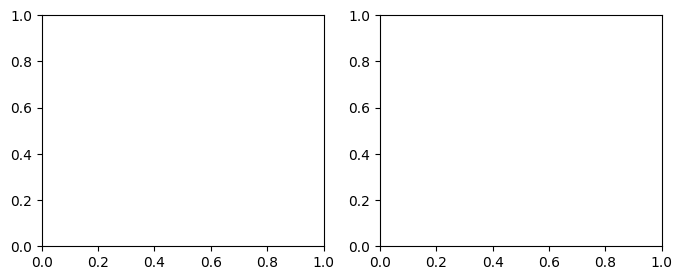

In [66]:
### empty canvas of 1 by 2 subplots
### note we have two axes objects here

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))  ### similar to plt.subplot(1, 2, ith axes)
# fig, axes = plt.subplots(1, 2)            ### same as above

The `axes` created is an array of two axes to be plotted:

In [62]:
### Axes i
axes

array([<Axes: >, <Axes: >], dtype=object)

We can loop through this array:

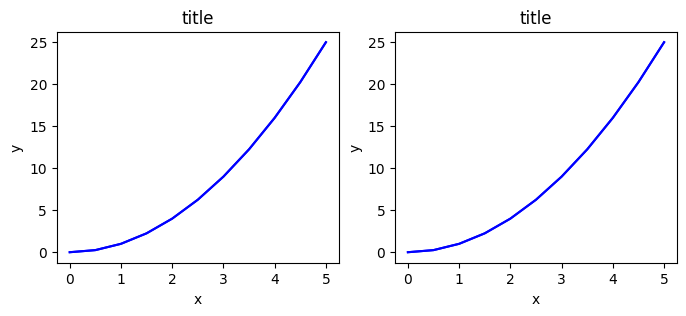

In [69]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

### display the figure object    
fig                             ### to show the figure in some environments

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

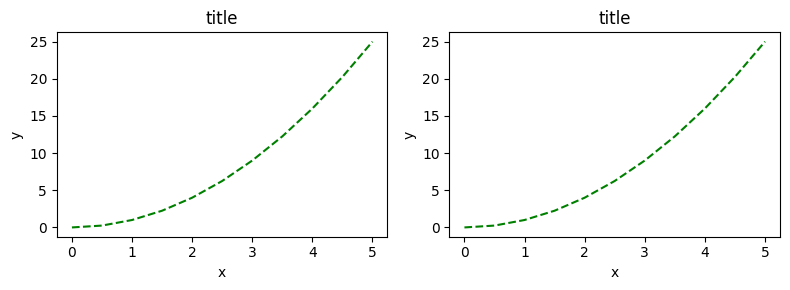

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))  ### similar to plt.subplot(1, 2, ith axes)

for ax in axes:
    ax.plot(x, y, 'g--')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

## Figure Size/Ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

The same arguments can also be passed to layout managers, such as the `subplots` function:

Text(0.5, 1.0, 'title')

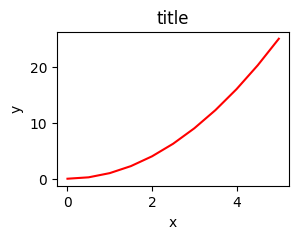

In [77]:
fig, axes = plt.subplots(figsize=(3,2))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

### DPI

Text(0.5, 1.0, 'title')

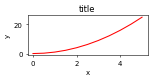

In [79]:
fig = plt.figure(figsize=(3,1), dpi=50)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Text(0.5, 1.0, 'title')

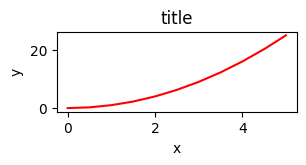

In [78]:
fig = plt.figure(figsize=(3,1), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [ ]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [ ]:
fig.savefig("filename.png", dpi=200)

## Legends

We have been using the methods set_xlabel, set_ylabel, and set_title when creating plots. Now let's look at another import element in an axes, the legends.

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method to add the legend to the figure: 

In [ ]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

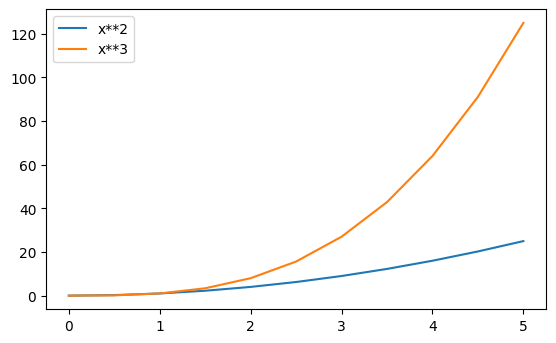

In [ ]:
fig = plt.figure(figsize=(5,3), dpi=100)

ax = fig.add_axes([0.1, 0.1, 1, 1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")      ### cubed
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

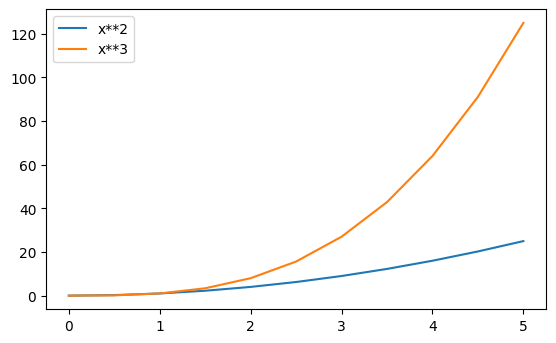

In [ ]:
# Lots of options....

### ax.legend(loc=1) # upper right corner
### ax.legend(loc=2) # upper left corner
### ax.legend(loc=3) # lower left corner
### ax.legend(loc=4) # lower right corner


### most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Colors, Linewidths, Linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

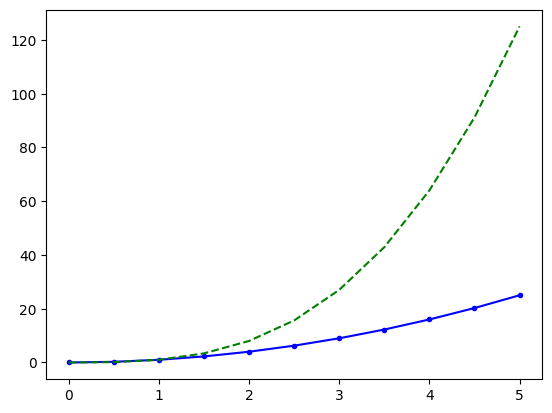

In [ ]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

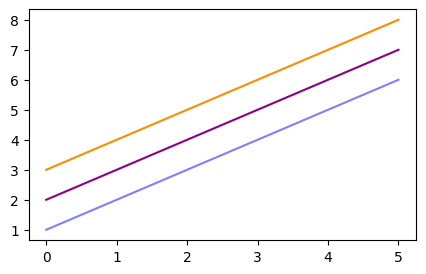

In [ ]:
fig, ax = plt.subplots(figsize=(5,3), dpi=100)

ax.plot(x, x+1, color="blue", alpha=0.5)  ### half-transparent
ax.plot(x, x+2, color="#8B008B")        ### RGB hex code
ax.plot(x, x+3, color="#FF8C00")        ### RGB hex code 

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

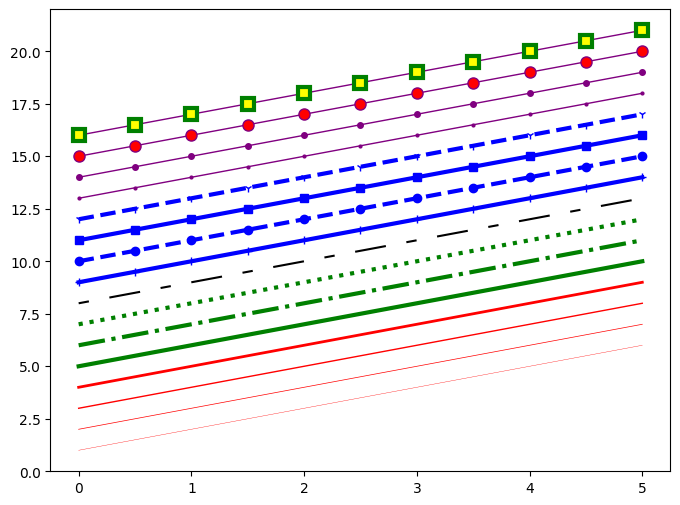

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", lw=1.00)
ax.plot(x, x+4, color="red", lw=2.00)

### possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

### custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10])        ### format: line length, space length, ...

### possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

### marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

## Control over axis appearance

In this section we will look at controlling axis sizing properties in a matplotlib figure.

### Plot Range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

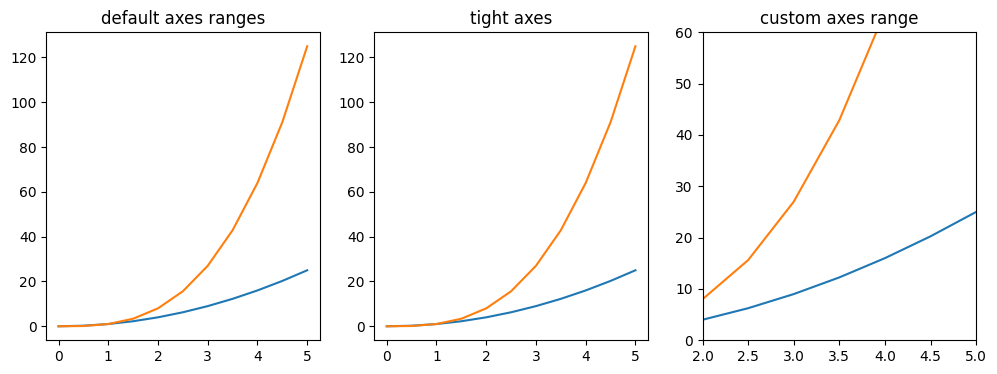

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

## Some Plot Types

So far, we have used a line plot to introduce Matplotlib. There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these types of plots we will actually create using Seaborn, a statistical plotting library for Python. Here let us take a look at some examples of these types of plots:

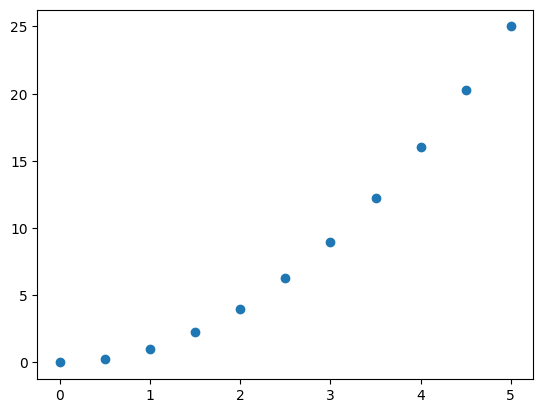

In [ ]:
plt.scatter(x,y)

(array([ 8., 13., 13., 12., 10.,  7.,  7.,  9., 13.,  8.]),
 array([  2. ,  98.3, 194.6, 290.9, 387.2, 483.5, 579.8, 676.1, 772.4,
        868.7, 965. ]),
 <BarContainer object of 10 artists>)

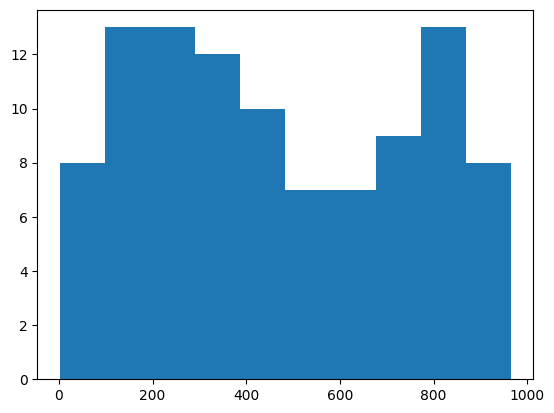

In [ ]:
from random import sample
data = sample(range(1, 1000), 100)     ### chooses 100 unique random elements from sequence.
plt.hist(data)

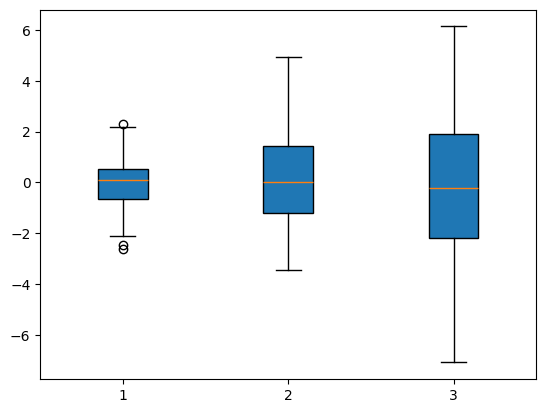

In [ ]:
### list comprehension

data = [np.random.normal(0, std, 100) for std in range(1, 4)]

### rectangular box plot
plt.boxplot(data, vert=True, patch_artist=True);   


### Box = Q1 to Q3 (IQR = Q3−Q1)
### Line in box = median
### Whiskers = last data points within 1.5 × IQR from Q1/Q3
### Circles = points outside that range